In [1]:
import numpy as np 
import matplotlib.pyplot as plt

The total rate at which energy is emitted by a blackbody is a function of temperature only and is given by the Stephan-Boltzman Law \
M(T) = $\sigma$ T^4 \
T is temperature \
M is the rate at which EM energy is emitted from the surface per meter squared Known as Exitance \
$\sigma$ Stephan-Boltzman constant 5.67*10^-8 W m^-2 K^-4

The Plank Distribution B_nu(T) \
The intensity at which electromagnetic radion is emitted from a blackbody varies with frequency of the EM radiation. The relation is given by the Plank distribution

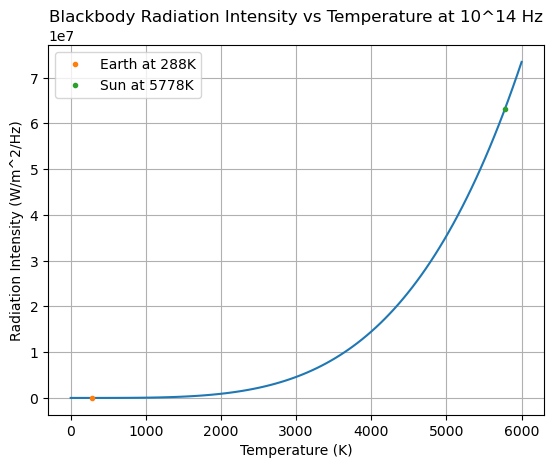

In [32]:
# Bulk Radiation analysis
h = 6.626*10**-34  # Planck's constant in J·s
c = 3.0*10**8    # Speed of light in m/s
k = 1.381*10**-23  # Boltzmann's constant in J/K
f = 1.0*10**14  # Frequency in Hz
sigma = (2*np.pi**5 * k**4) / (15*c**2 * h**3)  # Stefan-Boltzmann constant in W/m^2/K^4

def stefan_boltzmann(T):
    return sigma * T**4  
T = np.linspace(0.01, 6000, 100) # exteneded to 6000K so the sun can fit 
R = stefan_boltzmann(T)
#print(R)
plt.plot(T, R)
plt.xlabel('Temperature (K)')
plt.ylabel('Radiation Intensity (W/m^2/Hz)')
plt.title('Blackbody Radiation Intensity vs Temperature at 10^14 Hz')
plt.grid()
plt.plot(288, stefan_boltzmann(288), '.',label='Earth at 288K')  # Example at 288K
plt.plot(5778, stefan_boltzmann(5778), '.',label='Sun at 5778K')  # Example at 5778K (Sun's surface temperature)
plt.legend()

Spectral Exitance analysis 

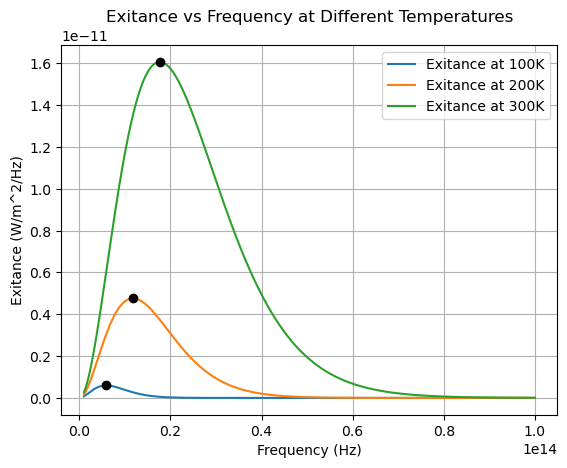

In [62]:
def exitance(T,freqs):
    M = 2*np.pi*h*freqs**3/c**2 * 1/(np.exp(h*freqs/(k*T))-1) # Spectral exitance (W/m^2/Hz) integral{[0,2pi][0,pi/2],(B_nu*cos(theta) * sin(theta) dtheta dphi)}
    B = 2*h*freqs**3/c**2 * 1/(np.exp(h*freqs/(k*T))-1) # Spectral radiance (W/m^2/sr/Hz)
    return M, B

freqs = np.linspace(1.0*10**12, 1.0*10**14, 1000)

M100 = exitance(100, freqs)[0]
M200 = exitance(200, freqs)[0]
M300 = exitance(300, freqs)[0]

i100 = np.argmax(M100)
i200 = np.argmax(M200)
i300 = np.argmax(M300)
nu100, M100_max = freqs[i100], M100[i100]
nu200, M200_max = freqs[i200], M200[i200]
nu300, M300_max = freqs[i300], M300[i300]


plt.plot(freqs, M100, label='Exitance at 100K')
plt.plot(freqs, M200, label='Exitance at 200K')
plt.plot(freqs, M300, label='Exitance at 300K')
plt.plot(nu100, M100_max, 'o',color='black')
plt.plot(nu200, M200_max, 'o',color='black')
plt.plot(nu300, M300_max, 'o',color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Exitance (W/m^2/Hz)')
plt.title('Exitance vs Frequency at Different Temperatures')
plt.legend()
plt.grid()
#plt.yscale('log')
plt.show()

Wien's displacement law states $\lambda_{\max} \propto 1/T$.

Note: frequency $\nu = c/\lambda$, it follows that $\nu_{\max} \propto T$.

In the graph above, the frequency which maximizes the spectral exitance
is shown to increase with temperature, agreeing with Wein's law.

Earth VS Sun 

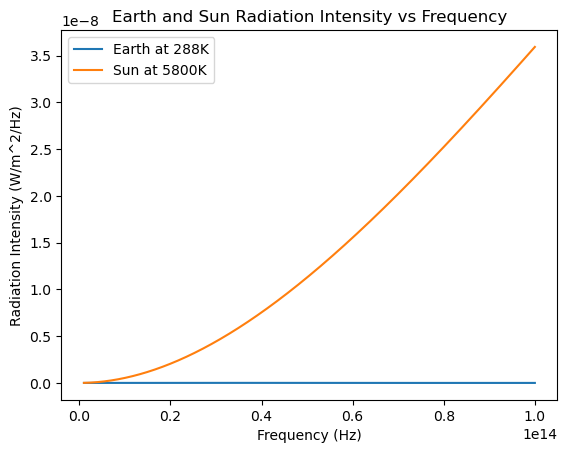

In [59]:
plt.plot(freqs,exitance(288, freqs)[0], label='Earth at 288K')
plt.plot(freqs,exitance(5800, freqs)[0], label='Sun at 5800K')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Radiation Intensity (W/m^2/Hz)')
plt.title('Earth and Sun Radiation Intensity vs Frequency')
plt.legend()


In the frequency range of 10^12 - 10^14 Hz (around infrared) the sun completly dominates the earths radiation intensity

In [60]:
#BULK VS SPECTRUAL EMISSION
M_sol = exitance(5772,freqs=np.linspace(1.0*10**2, 1.0*10**16, 300))[0]
total_M_sol = np.trapezoid(M_sol, x=np.linspace(1.0*10**2, 1.0*10**16, 300))
print("Total Exitance of the Sun (W/m^2):", total_M_sol)
print("sigma*T^4:", stefan_boltzmann(5772), "W/m^2")
print("The integrated exitance is close to the Stefan-Boltzmann law value.")

Total Exitance of the Sun (W/m^2): 62917235.988005705
sigma*T^4: 62917477.141076006 W/m^2
The integrated exitance is close to the Stefan-Boltzmann law value.
